<a href="https://colab.research.google.com/github/hargettc2015/DS-Unit-1-Sprint-2-Statistics/blob/master/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [15]:
!wget https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

--2019-11-05 20:54:28--  https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Congressional+Voting+Records’

Congressional+Votin     [ <=>                ]  21.70K  --.-KB/s    in 0.1s    

2019-11-05 20:54:29 (156 KB/s) - ‘Congressional+Voting+Records’ saved [22222]



In [0]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

In [19]:
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']
df = pd.read_csv('/content/sample_data/house-votes-84.data',
                 header=None,
                 names=column_headers,
                 na_values="?")

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [20]:
df = df.replace({'y':1, 'n': 0})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [21]:
rep = df[df['party']=='republican']
rep.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [22]:
dem = df[df['party']=='democrat']
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [0]:
from scipy.stats import chisquare 

In [28]:
#chisquare line
print(chisquare(rep['budget'], axis=None))

Power_divergenceResult(statistic=nan, pvalue=nan)


In [30]:
df = df.dropna()
df

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,democrat,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
426,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
427,republican,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
430,republican,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0


In [35]:
from scipy import stats

def confidence_interval(data, confidence = 0.95):
  
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof = 1)/np.sqrt(n)
  moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)

  return(mean - moe, mean, mean + moe)

confidence_interval(df['budget'])

(0.46547286579616826, 0.5301724137931034, 0.5948719617900385)

In [0]:
data = df['budget']

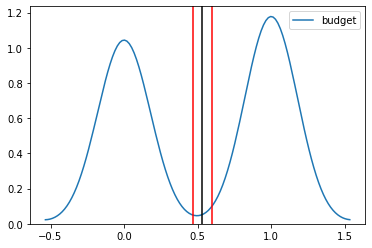

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data)
CI = confidence_interval(data)
plt.axvline(x=CI[0], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[1], color='k');

Interpret the confidence interval - what does it tell you about the data and its distribution?

**This chart shows that our mean is in the middle, shown in black(0.46547286579616826), and the red around it is our confidence intervals(0.5301724137931034, 0.5948719617900385). They tell us basically the degrees of freedom. That is meaning, the area of -/+ whatever around the mean. This chart seems pretty accurate in a way, because it has both republican and democratic voters in it, So it's safe to say that the mean in in the middle, because the likelyhood is about the same for saying yes, or no. It appears there are more yes, than no, overall, but that still doesn't change the fact that people will vote according to their party beliefs. Nice chart though :)**

In [0]:
from scipy.stats import t, ttest_1samp

In [44]:
import numpy as np

data_means=[]
for x in range(0, 100):
  data= np.random.binomial(n=1, p=.5, size=30)
  data_means.append(data.mean())

print(data_means)

[0.4666666666666667, 0.4666666666666667, 0.43333333333333335, 0.4666666666666667, 0.36666666666666664, 0.5666666666666667, 0.5666666666666667, 0.7333333333333333, 0.6666666666666666, 0.4666666666666667, 0.6, 0.4666666666666667, 0.43333333333333335, 0.6666666666666666, 0.43333333333333335, 0.5666666666666667, 0.5, 0.5333333333333333, 0.5666666666666667, 0.5666666666666667, 0.4666666666666667, 0.4, 0.43333333333333335, 0.4666666666666667, 0.4, 0.6, 0.36666666666666664, 0.5333333333333333, 0.43333333333333335, 0.5333333333333333, 0.6, 0.4, 0.5666666666666667, 0.36666666666666664, 0.5, 0.5333333333333333, 0.4, 0.7, 0.5333333333333333, 0.5666666666666667, 0.43333333333333335, 0.5, 0.6, 0.4, 0.5666666666666667, 0.6333333333333333, 0.6333333333333333, 0.5, 0.5333333333333333, 0.5333333333333333, 0.5666666666666667, 0.6666666666666666, 0.36666666666666664, 0.5, 0.5333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6, 0.3333333333333333, 0.5666666666666667, 0.6333333

In [46]:
#Sample Size
n = len(data_means)
#Degrees of freedom
dof= n-1
#Mean of means:
mean= np.mean(data_means) 
#Sample Standard Deviation
sample_std = np.std(data_means, ddof=1)
#Standard Error
std_err= sample_std/n**.5

CI = t.interval(.95, dof, loc=mean, scale=std_err)
print("95% Condifence Interval: ", CI)


95% Condifence Interval:  (0.4977626944988382, 0.5382373055011619)


In [48]:
t_stat = t.ppf(.975, dof)
print("t Statistic:", t_stat)

CI= (mean-(t_stat*std_err)), mean+(t_stat*std_err)
print("Confidence Interval", CI)

t Statistic: 1.9842169515086827
Confidence Interval (0.4977626944988382, 0.5382373055011619)


**NOTE FOR LATER USE>>>A null hypothesis that is just inside of our condifence intervel == fail to reject...A null hypothesis that's just outside our confidence interval==reject

In [93]:
df = pd.read_csv('/content/sample_data/adult.data', names = ['age','work-class','fnlqgt',
                          'education','education-num', 'marrital-status',
                          'occupation','relationship',
                          'race','sex','capital-gain',
                          'capital-loss', 'hours-per-week', 'native-country', 'total-money=per-year'])
                
df.head()

,age,work-class,fnlqgt,education,education-num,marrital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,total-money=per-year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [100]:
cut_points = [0, 9, 19, 29, 39, 49, 1000]
label_names = ['0-9', '10-19', '20-29', '30-39', '40-49', '50+']
df['age_range'] = pd.cut(df['age'], cut_points, labels=label_names)

df.head()

,age,work-class,fnlqgt,education,education-num,marrital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,total-money=per-year,hours_per_week_categories,age_range
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,30-39,30-39
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,50+,50+
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30-39,30-39
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,50+,50+
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,20-29,20-29


In [101]:
df['sex'].value_counts()


 Male      21790
 Female    10771
Name: sex, dtype: int64

In [102]:
df['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

In [105]:
my_observed = pd.crosstab(df['sex'], df['age_range'], margins=True)

my_observed

age_range,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,
Female,810,3176,2576,2161,2048,10771
Male,847,4878,6037,5014,5014,21790
All,1657,8054,8613,7175,7062,32561


In [106]:
my_observed = pd.crosstab(df['sex'], df['age_range'])
my_observed

age_range,10-19,20-29,30-39,40-49,50+
sex,,,,,
Female,810,3176,2576,2161,2048
Male,847,4878,6037,5014,5014


In [107]:
from scipy import stats

chi_squared, p_value, dof, expected = stats.chi2_contingency(my_observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))


Chi-Squared: 454.4898295235139
P-value: 4.647170308895553e-97
Degrees of Freedom: 4
Expected: 
 [[ 548.12650103 2664.21897362 2849.13310402 2373.45060041 2336.07082092]
 [1108.87349897 5389.78102638 5763.86689598 4801.54939959 4725.92917908]]


In [110]:
my_observed = pd.crosstab(df['sex'], df['age'], margins=True)
my_observed

age,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,90,All
sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,186,268,356,363,329,342,359,305,313,290,294,310,271,273,282,255,255,257,246,287,229,236,256,263,233,228,229,202,222,228,214,171,171,156,163,134,136,105,137,106,91,105,94,79,79,88,64,70,57,48,52,42,33,28,26,25,22,19,14,16,9,7,5,5,9,2,1,4,1,1,0,1,14,10771
Male,209,282,356,390,391,423,518,493,528,495,541,557,542,588,606,573,620,629,630,611,629,591,560,531,575,552,541,522,512,509,494,372,406,446,432,344,328,310,282,260,267,261,261,233,221,170,166,138,121,102,99,78,75,61,46,42,42,32,31,30,20,16,17,17,11,10,5,6,2,0,1,2,29,21790
All,395,550,712,753,720,765,877,798,841,785,835,867,813,861,888,828,875,886,876,898,858,827,816,794,808,780,770,724,734,737,708,543,577,602,595,478,464,415,419,366,358,366,355,312,300,258,230,208,178,150,151,120,108,89,72,67,64,51,45,46,29,23,22,22,20,12,6,10,3,1,1,3,43,32561


In [112]:
females = my_observed.iloc[0][0:6].values
females

array([186, 268, 356, 363, 329, 342])

In [113]:
males = my_observed.iloc[0][0:6].values
males

array([186, 268, 356, 363, 329, 342])

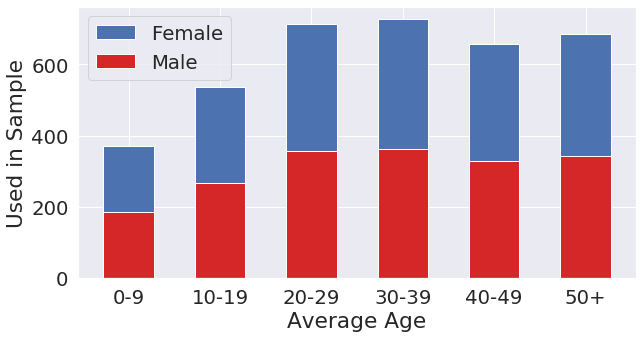

In [117]:
chart = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
sets = ["0-9", "10-19", "20-29", "30-39", "40-49", "50+"]
p1 = plt.bar(sets, males, 0.55, color='#d62728')
p2 = plt.bar(sets, females, 0.55, bottom=males)
plt.legend((p2[0],p1[0]), ('Female', 'Male'))
plt.xlabel('Average Age')
plt.ylabel('Used in Sample')
plt.show()

In [118]:
sums_per_row = my_observed.iloc[0:2,6].values
sums_per_column = my_ordered.iloc[2, 0:6].values

print(sums_per_row)
print(sums_per_column)

[359 518]
[395 550 712 753 720 765]


In [120]:
total_participants = my_observed.loc['All', 'All']
total_participants

32561

In [123]:
expected= []
for i in range(len(sums_per_row)):
  expected_row = []
  for column in sums_per_column:
    expected_val = column*sums_per_row[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)

print(expected.shape)
print(expected)

(2, 6)
[[ 4.35505666  6.06400295  7.85012745  8.30217131  7.93833113  8.43447683]
 [ 6.28389791  8.74973127 11.32692485 11.97917754 11.45419367 12.17008077]]


In [124]:
my_observed = pd.crosstab(df['sex'], df['age_range']).values
print(my_observed.shape)
my_observed

(2, 5)


array([[ 810, 3176, 2576, 2161, 2048],
       [ 847, 4878, 6037, 5014, 5014]])

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)